<a href="https://colab.research.google.com/github/toni249/Basic-Machine-Learning-Implementation/blob/master/Project2_cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
print('Tensorflow : ', tf.__version__)
print("is gpu ",tf.test.is_gpu_available())

Tensorflow :  2.2.0
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
is gpu  True


In [2]:
def get_three_classes(x,y):
  ind1, _ = np.where(y==0.)
  ind2, _ = np.where(y==1.)
  ind3, _ = np.where(y==2.)

  idx = np.concatenate([ind1,ind2,ind3],axis=0)

  x=x[idx]
  y=y[idx]

  count=x.shape[0]
  idx = np.random.choice(range(count),count,replace=False)

  x=x[idx]
  y=y[idx]

  y=tf.keras.utils.to_categorical(y)

  return x,y

In [3]:
(x_train,y_train) , (x_test,y_test) = tf.keras.datasets.cifar10.load_data()
x_train,y_train = get_three_classes(x_train,y_train)
x_test,y_test  = get_three_classes(x_test,y_test)
print(x_train.shape,x_test.shape)

170500096/170498071 [==============================] - 3s 0us/step
(15000, 32, 32, 3) (3000, 32, 32, 3)


In [40]:
np.unique(y_test)

array([0., 1.], dtype=float32)

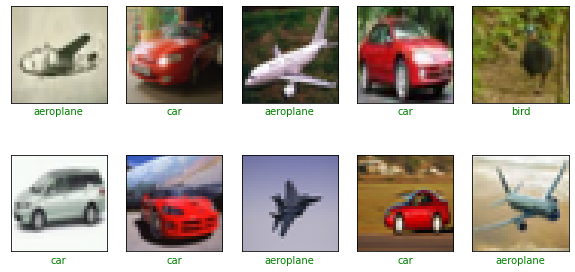

In [4]:
class_name = ['aeroplane','car','bird']

def show_random_ex(x,y,p):
  idx = np.random.choice(range(x.shape[0]),10,replace = False)
  x=x[idx]
  y=y[idx]
  p=p[idx]

  plt.figure(figsize = [10,5])
  for i in range(10):
    plt.subplot(2,5,1+i)
    plt.imshow(x[i])
    plt.xticks([])
    plt.yticks([])
    col = 'green' if np.argmax(y[i]) == np.argmax(p[i]) else 'red'
    plt.xlabel(class_name[np.argmax(p[i])],color=col)
  plt.show()

show_random_ex(x_train,y_train,y_train)

In [23]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=[32,32,3]),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation ='relu'),
    tf.keras.layers.Dense(3,activation='softmax')
])

model.summary()

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)
history = model.fit(
    x_train/255.0,y_train,
    validation_data=(x_test/255.0,y_test),
    epochs = 10,
    batch_size = 64,
)



Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 4, 4, 128)        

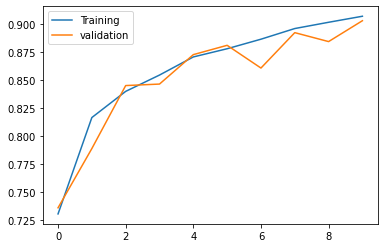

In [24]:
acc =history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(range(len(acc)), acc, label='Training')
plt.plot(range(len(val_acc)), val_acc, label='validation')

plt.legend()
plt.show()

In [25]:
pred = model.predict(x_test)


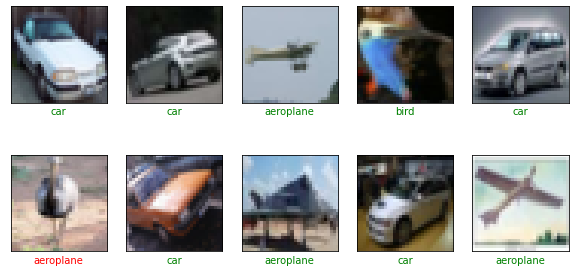

In [30]:
show_random_ex(x_test,y_test,pred)